# Project Bank Query Chatbot

In [1]:
# Import the required libraries and read dataset into a pandas DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bankdata = pd.read_csv("BankFAQs.csv")

In [3]:
Bankdata.head()

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


In [4]:
Bankdata.tail()

,Question,Answer,Class
1768,Which languages do you speak,just English. But I'm trying to learn new lang...,accounts
1769,how much is interest for FD,7%,accounts
1770,how much is interest for Fixed Deposit,7%,accounts
1771,Fixed Deposit,7%,accounts
1772,FD,7%,accounts


In [5]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [6]:
Bankdata.shape

(1773, 3)

In [7]:
print(Bankdata.dtypes)

Question    object
Answer      object
Class       object
dtype: object


In [8]:
Bankdata.describe()

,Question,Answer,Class
count,1773,1773,1773
unique,1343,1446,7
top,How can I change the mode of repayment/ accoun...,Post Dated Cheques(PDCs)/Security Cheques subm...,insurance
freq,18,17,469


In [9]:
Bankdata.columns

Index(['Question', 'Answer', 'Class'], dtype='object')

In [10]:
Bankdata.nunique()

Question    1343
Answer      1446
Class          7
dtype: int64

In [11]:
Bankdata['Question'].unique()

array(['What are the documents required for opening a Current Account of a sole proprietorship firm',
       'Can I transfer my Current Account from one branch to another',
       'My present status is NRI. What extra documents are required for opening a Sole Proprietorship Current Account',
       ..., 'how much is interest for Fixed Deposit', 'Fixed Deposit',
       'FD'], dtype=object)

In [12]:
Bankdata['Answer'].unique()

array(['Following documents are required to open a Current Account of a sole proprietorship entity: Proof of existence in the name of firm Proof of address in the name of firm KYC of the proprietor Any two of the below listed documents shall be obtained for establishing proof of existence. Registration certificate/license issued by Municipal authorities such as Shop & Establishment Certificate/Trade License CST/VAT/Service Tax Certificate or Letter Of Registration for CST/VAT/Service Tax Certificate/Registration document issued by Professional Tax authorities Valid Business License or Certificate Of Registration issued by State/Central Government authority (validity would include the grace period for renewal as mentioned in the certificate) RBI/SEBI Registration Certificate License issued by Food and Drug Control Authorities Import - Export certificate (IEC Code) issued by the Director General of Foreign Trade Documents for establishing proof of address Landline telephone bill/electric

In [13]:
Bankdata['Class'].unique()

array(['accounts', 'cards', 'fundstransfer', 'insurance', 'investments',
       'loans', 'security'], dtype=object)

In [14]:
Bankdata.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [15]:
Bankdata['Class'].value_counts()

insurance        469
cards            403
loans            375
accounts         315
investments      140
security          57
fundstransfer     14
Name: Class, dtype: int64

In [16]:
## There are 7 different types of categories in Class

In [17]:
# Uploading another Bank FAQ dataset
Bank_data2 = pd.read_csv("BankData2.csv")
Bank_data2

,Question,Answer,Class
0,Whether Banks are required to capture the deta...,No. Banks are not required to provide the deta...,business
1,"As per RBI guidelines, Banks can use third par...",No. Third party places are neither places of b...,business
2,What will be the time of supply in respect of ...,Where the services are rendered upto 30th June...,services
3,Which tax is to be applied by the service prov...,The time of supply being issuance of invoice u...,services
4,Is it necessary for Banks / insurers to report...,Yes. In the absence of any specific exemption ...,services
...,...,...,...
60,What will be the place of supply in cases wher...,As per the provisions of Section 12(12) of the...,services
61,"Will GST be charged in transactions, where loa...",GST will be chargeable on any transaction proc...,transactions
62,Whether GST will be levied on sale of re-posse...,Sale of repossessed asset falls within the sco...,credits
63,Whether GST will be levied on interchange fees...,Fees charged for card settlement is a consider...,credits


In [18]:
Bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  65 non-null     object
 1   Answer    65 non-null     object
 2   Class     65 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [19]:
Bank_data2.head()

,Question,Answer,Class
0,Whether Banks are required to capture the deta...,No. Banks are not required to provide the deta...,business
1,"As per RBI guidelines, Banks can use third par...",No. Third party places are neither places of b...,business
2,What will be the time of supply in respect of ...,Where the services are rendered upto 30th June...,services
3,Which tax is to be applied by the service prov...,The time of supply being issuance of invoice u...,services
4,Is it necessary for Banks / insurers to report...,Yes. In the absence of any specific exemption ...,services


In [20]:
Bank_data2.tail()

,Question,Answer,Class
60,What will be the place of supply in cases wher...,As per the provisions of Section 12(12) of the...,services
61,"Will GST be charged in transactions, where loa...",GST will be chargeable on any transaction proc...,transactions
62,Whether GST will be levied on sale of re-posse...,Sale of repossessed asset falls within the sco...,credits
63,Whether GST will be levied on interchange fees...,Fees charged for card settlement is a consider...,credits
64,What is the leviability of GST on securitizati...,Securitized assets are in the nature of securi...,transactions


In [21]:
Bank_data2.shape

(65, 3)

In [22]:
print(Bank_data2.dtypes)

Question    object
Answer      object
Class       object
dtype: object


In [23]:
Bank_data2.describe

<bound method NDFrame.describe of                                              Question  \
0   Whether Banks are required to capture the deta...   
1   As per RBI guidelines, Banks can use third par...   
2   What will be the time of supply in respect of ...   
3   Which tax is to be applied by the service prov...   
4   Is it necessary for Banks / insurers to report...   
..                                                ...   
60  What will be the place of supply in cases wher...   
61  Will GST be charged in transactions, where loa...   
62  Whether GST will be levied on sale of re-posse...   
63  Whether GST will be levied on interchange fees...   
64  What is the leviability of GST on securitizati...   

                                               Answer         Class  
0   No. Banks are not required to provide the deta...      business  
1   No. Third party places are neither places of b...      business  
2   Where the services are rendered upto 30th June...      services  
3

In [24]:
Bank_data2.columns

Index(['Question', 'Answer', 'Class'], dtype='object')

In [25]:
Bank_data2.nunique()

Question    65
Answer      65
Class        4
dtype: int64

In [26]:
Bank_data2['Question'].unique()

array(['Whether Banks are required to capture the details of ATMs in registration certificate as a ‘place of business’',
       'As per RBI guidelines, Banks can use third party ATMs, Business Correspondents (BC), Customer Service Points (CSP) or third party warehouses. Are Banks required to include these third party places also in their GST registration',
       'What will be the time of supply in respect of services rendered upto 30th June, 2017 where the invoices are raised or payments are received after 30th June, 2017',
       'Which tax is to be applied by the service provider on invoice issued on or after 1st July 2017 for services rendered up to 30th June 2017?',
       'Is it necessary for Banks / insurers to report the details of exempt and non-GST supplies in Table 8 of GSTR-1?',
       'Is it necessary for Banks / insurers to report the details of invoices in Table 13 of GSTR-1?',
       'It is envisaged that many customers may not provide the GSTIN to the Banks in time. In

In [27]:
Bank_data2['Answer'].unique()

array(['No. Banks are not required to provide the details of ATMs while applying for registration. For the purposes of registration, ATM on its own does not constitute a place of business, as defined in the CGST Act, 2017',
       'No. Third party places are neither places of business nor fixed establishments from where Banks ordinarily carry on their business. These are independent service providers to the Bank which are subject to GST. Thus, these places are not required to be declared as place of business by the Bank',
       'Where the services are rendered upto 30th June, 2017 and invoices in respect thereof are also raised on or before 30th June, 2017, the point of taxation would be as per the earlier service tax law and the services will be subject to service tax. Where the services are rendered upto 30th June, 2017 and the services are liable to be taxed under the reverse charge mechanism, the point of tax for such services as per the Point of Taxation Rules, 2011 shall be the 

In [28]:
Bank_data2['Class'].unique()

array(['business', 'services', 'transactions', 'credits'], dtype=object)

In [29]:
Bank_data2.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [30]:
Bank_data2['Class'].value_counts()

services        34
credits         19
transactions     8
business         4
Name: Class, dtype: int64

In [31]:
# Combining 2 datasets by append method

In [32]:
# BankMerge = pd.concat([Bankdata,Bank_data2])
BankMerge = Bankdata.append((Bank_data2))

C:\Users\Admin\AppData\Local\Temp\ipykernel_1292\3681970286.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BankMerge = Bankdata.append((Bank_data2))


# Exploratory Data Analysis (EDA)

In [33]:
# Checking top 5 columns for merged dataset BankMerge
BankMerge.head()

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


In [34]:
# Checking bottom 5 rows
BankMerge.tail()

,Question,Answer,Class
60,What will be the place of supply in cases wher...,As per the provisions of Section 12(12) of the...,services
61,"Will GST be charged in transactions, where loa...",GST will be chargeable on any transaction proc...,transactions
62,Whether GST will be levied on sale of re-posse...,Sale of repossessed asset falls within the sco...,credits
63,Whether GST will be levied on interchange fees...,Fees charged for card settlement is a consider...,credits
64,What is the leviability of GST on securitizati...,Securitized assets are in the nature of securi...,transactions


In [35]:
# Checking for total numbers of rows and columns
BankMerge.shape

(1838, 3)

In [36]:
# Checking what type of data present in dataset
print(BankMerge.dtypes)

Question    object
Answer      object
Class       object
dtype: object


In [37]:
# Description data analysis
BankMerge.describe()

,Question,Answer,Class
count,1838,1838,1838
unique,1408,1511,11
top,How can I change the mode of repayment/ accoun...,Post Dated Cheques(PDCs)/Security Cheques subm...,insurance
freq,18,17,469


In [38]:
# Checking column names
BankMerge.columns

Index(['Question', 'Answer', 'Class'], dtype='object')

In [39]:
# Checking unique number counts 
BankMerge.nunique()

Question    1408
Answer      1511
Class         11
dtype: int64

In [40]:
# Checking unique elements present in given column
BankMerge['Question'].unique()

array(['What are the documents required for opening a Current Account of a sole proprietorship firm',
       'Can I transfer my Current Account from one branch to another',
       'My present status is NRI. What extra documents are required for opening a Sole Proprietorship Current Account',
       ..., 'Whether GST will be levied on sale of re-possessed asset',
       'Whether GST will be levied on interchange fees on card settlement fees paid/shared by banks?',
       'What is the leviability of GST on securitization transactions undertaken by banks?'],
      dtype=object)

In [41]:
# Checking unique elements present in given column
BankMerge['Answer'].unique()

array(['Following documents are required to open a Current Account of a sole proprietorship entity: Proof of existence in the name of firm Proof of address in the name of firm KYC of the proprietor Any two of the below listed documents shall be obtained for establishing proof of existence. Registration certificate/license issued by Municipal authorities such as Shop & Establishment Certificate/Trade License CST/VAT/Service Tax Certificate or Letter Of Registration for CST/VAT/Service Tax Certificate/Registration document issued by Professional Tax authorities Valid Business License or Certificate Of Registration issued by State/Central Government authority (validity would include the grace period for renewal as mentioned in the certificate) RBI/SEBI Registration Certificate License issued by Food and Drug Control Authorities Import - Export certificate (IEC Code) issued by the Director General of Foreign Trade Documents for establishing proof of address Landline telephone bill/electric

In [42]:
# Checking unique categories present in given column
BankMerge['Class'].unique()

array(['accounts', 'cards', 'fundstransfer', 'insurance', 'investments',
       'loans', 'security', 'business', 'services', 'transactions',
       'credits'], dtype=object)

In [43]:
# Checking null values present in data
BankMerge.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [44]:
# Checking value counts for given column
BankMerge['Class'].value_counts()

insurance        469
cards            403
loans            375
accounts         315
investments      140
security          57
services          34
credits           19
fundstransfer     14
transactions       8
business           4
Name: Class, dtype: int64

# Data Visualisation

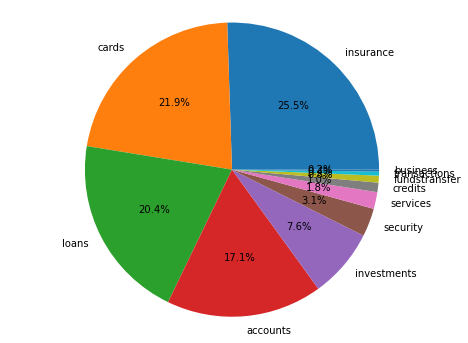

In [45]:
# Pie Chart representing analysis
plt.figure(figsize = (8,6))
value_counts = BankMerge['Class'].value_counts()
plt.pie(value_counts.values, labels = value_counts.index, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

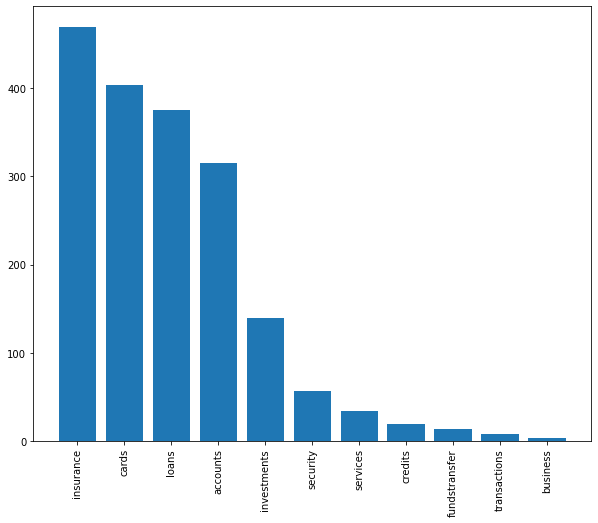

In [46]:
# Bar Chart representing analysis
plt.figure(figsize = (10,8))
value_counts = BankMerge['Class'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=90)
plt.show()

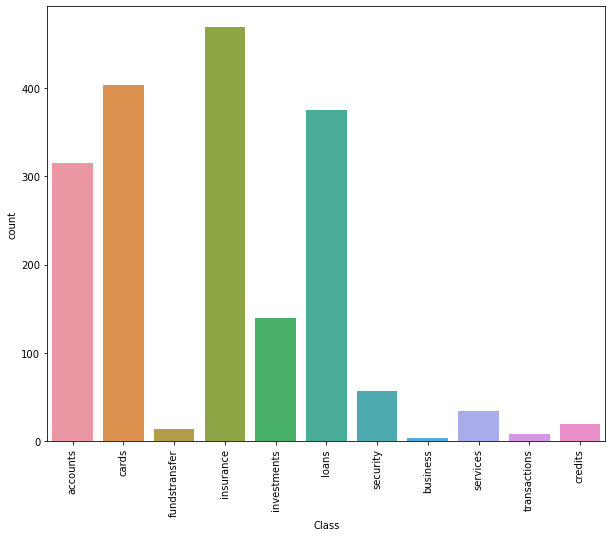

In [47]:
# Count Plot finding out which Class has most impact
plt.figure(figsize = (10,8))
sns.countplot(x = 'Class', data = BankMerge)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Class'>

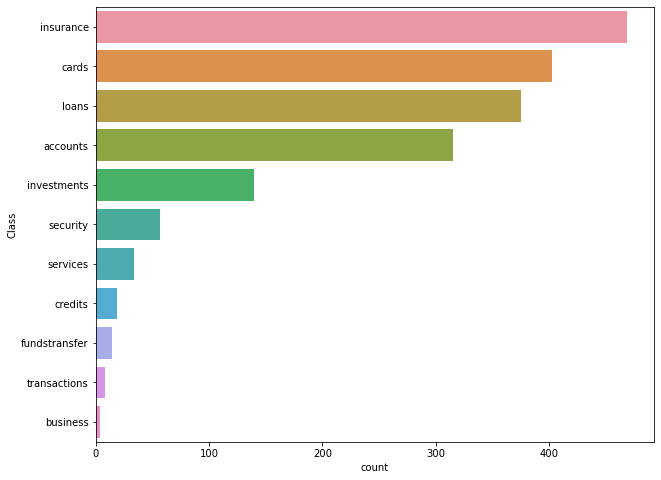

In [48]:
# Horizontal countplot
plt.figure(figsize = (10,8))
sns.countplot(y="Class", data=BankMerge, orient='h', order = BankMerge.Class.value_counts().index)

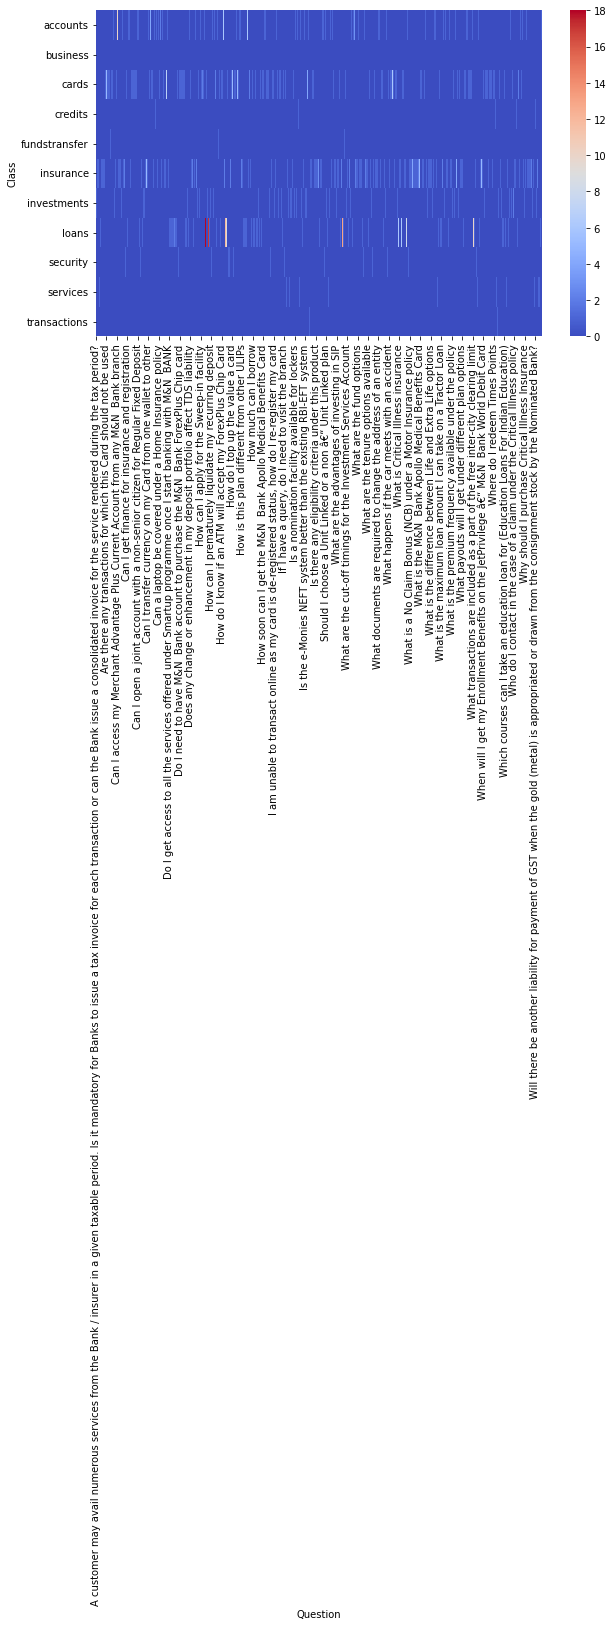

In [49]:
# Heat Map
plt.figure(figsize = (10,6))
cross_tab = pd.crosstab(BankMerge['Class'], BankMerge['Question'])
sns.heatmap(cross_tab, cmap='coolwarm')
plt.show()

In [50]:
import pandas_profiling as pp

C:\Users\Admin\AppData\Local\Temp\ipykernel_1292\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [51]:
# genrating report
from pandas_profiling import ProfileReport
profile = ProfileReport(BankMerge)
profile.to_file(output_file= "BankMerge.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
profile

# Feature Engineering - Text Cleaning

In [53]:
# Count the number of duplicate rows
# dataframe = pd.read_csv('BankMerge.csv')
print('Number of duplicate rows:', BankMerge.duplicated().sum())

# Drop the duplicate rows
BankMerge.drop_duplicates(inplace=True)

# Count the number of rows after dropping duplicates
print('Number of rows after dropping duplicates:', len(BankMerge))

Number of duplicate rows: 274
Number of rows after dropping duplicates: 1564


In [54]:
BankMerge

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
60,What will be the place of supply in cases wher...,As per the provisions of Section 12(12) of the...,services
61,"Will GST be charged in transactions, where loa...",GST will be chargeable on any transaction proc...,transactions
62,Whether GST will be levied on sale of re-posse...,Sale of repossessed asset falls within the sco...,credits
63,Whether GST will be levied on interchange fees...,Fees charged for card settlement is a consider...,credits


In [55]:
BankMerge['Class'].unique()

array(['accounts', 'cards', 'fundstransfer', 'insurance', 'investments',
       'loans', 'security', 'business', 'services', 'transactions',
       'credits'], dtype=object)

In [56]:
from sklearn import preprocessing
# Applying label encoder in class column
le = preprocessing.LabelEncoder()
le.fit(['Class'])
BankMerge['Class'] = le.fit_transform(BankMerge['Class'])
BankMerge['Class']

0      0
1      0
2      0
3      0
4      0
      ..
60     9
61    10
62     3
63     3
64    10
Name: Class, Length: 1564, dtype: int32

In [57]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
# Define a function to preprocess text
def preprocess_text(text):
    
    text = text.lower() # lower case conversion
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # removal of punctuation
    text = re.sub("\[.*?\]'\w+", '',text) # removal of ticks and next character 
    text = re.sub(r'\w*\d+\w*', '', text) # removal of numbers
    text = re.sub('\n', '', text)# removal of special characters
    text = text.encode('ascii','ignore').decode() # removal of unicode characters
    tokens = word_tokenize(text) # tokenizing the text
    filtered_text = [w for w in tokens if not w in stop_words] # removing stop words
    return " ". join(filtered_text) # returning the process text data.

# applying the changes in the dataframe.
BankMerge['Question'] = BankMerge['Question'].apply(preprocess_text)

# Define a function to lemmatize text
lemm = WordNetLemmatizer()
def lemmatize(data):
    text = [lemm.lemmatize(word) for word in data]
    return data

BankMerge['Question'] = BankMerge['Question'].apply(lambda x: lemmatize(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
# IV and DV converted into array
X = BankMerge['Question'].values
y = BankMerge['Class'].values
X[:5], y[:5]

(array(['documents required opening current account sole proprietorship firm',
        'transfer current account one branch another',
        'present status nri extra documents required opening sole proprietorship current account',
        'documents required opening current account limited liability partnership',
        'documents required change address entity'], dtype=object),
 array([0, 0, 0, 0, 0]))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer object
tfidf = TfidfVectorizer()

# Fit the vectorizer on the IV 
X_tfidf = tfidf.fit_transform(X)

# Applied dense to the fitted vectorizer
X_tfidf.todense()

BankMerge_tfidf = pd.DataFrame(X_tfidf.todense(),columns=tfidf.get_feature_names())
BankMerge_tfidf

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abroad,accept,accepted,access,accessories,accident,accidental,account,accounts,...,working,world,would,write,writing,year,yearly,years,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232106,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149675,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192062,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y , test_size=0.2, random_state=60)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Create the SVM model
svc_model = svm.SVC()

# Train your model
svc_model.fit(X_train, y_train)

# make predictions using the loaded SVC model
y_pred = svc_model.predict(X_test)

# print the predictions
# print(y_pred)

# Calculate the F1 score and accuracy of the predictions
f1 = (f1_score(y_test, y_pred, average='weighted')*100)

# Print the performance metrics and predicted probabilities
print(f"F1 score: {f1:.3f}")

Train set: (1251, 1497) (1251,)
Test set: (313, 1497) (313,)
F1 score: 83.663


In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

param_grid = {'C': [1, 2, 3, 5], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svc_model = svm.SVC()

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best hyperparameters: ", test_accuracy)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy with best hyperparameters:  0.8945686900958466


In [62]:
# Test new Parameters:
svc_model = svm.SVC(C=1, gamma='scale', kernel='linear')

# Train your model
svc_model.fit(X_train, y_train)

# make predictions using the loaded SVC model
y_pred = svc_model.predict(X_test)

svc_model.score(X_train, y_train)

# print the predictions
print(y_pred)

[0 5 0 0 2 0 7 5 5 8 5 2 6 5 2 0 7 9 7 2 5 0 0 0 9 5 2 7 4 8 2 5 2 2 7 5 5
 5 5 2 0 7 5 5 5 0 7 5 7 5 5 2 2 5 6 2 5 2 2 8 2 0 5 0 6 0 6 2 0 2 6 3 2 5
 2 5 2 5 5 7 0 0 2 0 0 2 2 5 0 2 0 9 5 8 5 8 5 5 2 5 2 7 2 7 5 2 2 5 5 7 5
 5 5 6 5 5 5 5 2 0 0 0 6 5 7 7 5 5 5 0 5 5 2 5 5 2 9 5 5 7 8 0 5 2 5 5 0 5
 7 2 7 5 7 2 5 5 6 2 2 7 0 7 7 5 7 7 0 5 5 0 8 5 5 2 7 7 2 2 5 0 2 5 7 2 7
 0 7 5 2 7 2 2 7 7 5 6 7 5 0 3 2 5 7 7 5 5 2 6 0 2 2 0 5 6 7 6 5 0 2 6 6 7
 5 5 0 7 5 0 2 6 5 7 2 0 8 5 2 7 0 5 5 7 5 2 7 9 2 0 2 2 2 2 5 6 2 5 2 2 5
 5 9 2 5 5 5 6 2 2 5 6 5 2 6 3 5 5 8 6 2 5 5 2 5 0 2 5 8 5 5 2 2 2 0 0 2 5
 2 2 6 2 7 0 2 0 5 5 0 5 0 5 2 5 2]


In [63]:
# Calculate the F1 score and accuracy of the predictions
f1 = (f1_score(y_test, y_pred, average='weighted')*100)
acc = (accuracy_score(y_test, y_pred)*100)

# Print the performance metrics and predicted probabilities
print(f"F1 score: {f1:.3f}")
print(f"Linear SVC Accuracy: {acc:.3f}")

# Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Linear SVC Accuracy : ", f1_score(y_test,y_pred, average = 'weighted')*100)
print("Precision : ", precision_score(y_test,y_pred, average = 'weighted')*100)
print("Recall : ", recall_score(y_test,y_pred, average = 'weighted')*100)

F1 score: 89.014
Linear SVC Accuracy: 89.457
Linear SVC Accuracy :  89.01363051979209
Precision :  89.32948625110436
Recall :  89.45686900958466


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Importing pickle

In [64]:
#import pickle

# Save the model to a file using pickle
# with open('svc_model.pkl', 'wb') as file:
    # pickle.dump(svc_model, file)

# Dump the vectorizer into a pickle file called "tfidf.pkl"
# with open('tfidf.pkl', 'wb') as file:
    # pickle.dump(tfidf, file)

### Cosine_similarity check

In [65]:
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity

# user_question = "What is the procedure to open a new account"

## Create a TF-IDF vectorizer to convert the text data and query to a vector representation
# tfidf.fit_transform(BankMerge['Answer'].values.tolist() + [user_question])

# Get the vector representation of the question and answer
# answer_tfidf = tfidf.transform(BankMerge['Answer']).toarray()
# test_tfidf = tfidf.transform([user_question]).toarray()

# Calculate the cosine similarity between both vectors
# cosine_sims = cosine_similarity(answer_tfidf, test_tfidf)

# Get the index of the most similar text to the query
# most_similar_idx = np.argmax(cosine_sims)

# Print the most similar text as the answer to the query
# print("Answer: ", BankMerge.iloc[most_similar_idx]['Answer'])

In [66]:
from flask import Flask, request, jsonify, render_template
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
import pandas as pd
import numpy as np
!pip install streamlit
import streamlit as st
import fsspec 

# Load the preprocessed data
BankMerge = pd.read_csv('BankMerge.csv')
BankMerge = pd.read_csv('BankMerge.csv',encoding='ISO-8859-1')

# BankMerge = pd.concat([BankFAQs,BankData2])

# Define the TD-IDF vectorizer and fit it to the data
tdidf = TfidfVectorizer()
tdidf.fit(BankMerge['Question'].str.lower())

# Define the support vector machine model and fit it to the data
svc_model = svm.SVC(C=1, degree=2, gamma='scale', kernel='linear')
svc_model.fit(tdidf.transform(BankMerge['Question'].str.lower()), BankMerge['Class'])

# Define a function to get the answer to a given question
def get_answer(question):
    # Vectorize the question
    question_tdidf = tdidf.transform([question.lower()])
    
    # Calculate the cosine similarity between both vectors
    cosine_sims = cosine_similarity(question_tdidf, tdidf.transform(BankMerge['Question'].str.lower()))

    # Get the index of the most similar text to the query
    most_similar_idx = np.argmax(cosine_sims)

    # Get the predicted class of the query
    predicted_class = svc_model.predict(question_tdidf)[0]
    
    # If the predicted class is not the same as the actual class, return an error message
    if predicted_class != BankMerge.iloc[most_similar_idx]['Class']:
        return 'Sorry could not find an appropriate answer. Kindly contact customer care number'
    
    # Get the answer and construct the response
    answer = BankMerge.iloc[most_similar_idx]['Answer']
    response = f"Answer: {answer}"
    
    return response


# Create a streamlit app

def app():
    # Set the app title
    st.set_page_config(page_title="Bank Chatbot Interface", page_icon=":bank:")

    # Add a title and description to the app
    st.title("Welcome to Bank ChatBot Interface")
    st.markdown("Greetings! I am a ChatBot programmed to provide you with the information that you require.")
    st.write("I am here to assist you, please feel free to ask me any questions that you may have.")
    st.write("What can I help you with today?")
    # ("This app uses a Machine Learning Model to answer the frequently asked questions about banking.")

    # Create a text input for the user to ask a question
    question = st.text_input("Please enter a question")

    # Add a button to submit the question
    if st.button("Submit"):
        # Check if the user has entered a question
        if question == "":
            st.warning("Please enter a question.")
        else:
            # Call the get_answer function to predict the answer to the question
            answer = get_answer(question)

            # Display the answer to the user
            st.success(answer)

# Run the streamlit app
if __name__ == '__main__':
    app()

2023-04-20 13:33:33.657 
  command:

    streamlit run C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
